<a href="https://colab.research.google.com/github/ulyagram77/Intelligent_Data_Analysis_Labs/blob/master/Laboratorna6/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
from skimage.io import imread, imsave
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.feature_extraction.image import extract_patches_2d, reconstruct_from_patches_2d
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
from sklearn.decomposition import MiniBatchDictionaryLearning
from skimage.feature import ORB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import cv2

# **`Завдання 1`**. Колоризація картинок

#### 1) Завантажити цифрове зображення iз великою варiативнiстю кольорiв, наприклад пейзаж. Зробити копiю завантаженого зображення у форматi вiдтiнкiв сiрого для задачi колоризацiї зображення.

In [71]:
train_picture_path = '/content/drive/MyDrive/Intelligent_Analysys_Labs/Laboratorna6/images/train_photo.jpg'
test_picture_path = '/content/drive/MyDrive/Intelligent_Analysys_Labs/Laboratorna6/images/test_photo.jpg'

In [72]:
image = imread(train_picture_path)
image = cv2.resize(image, (300, 300))

In [73]:
image_gray = imread(train_picture_path, as_gray=True)
image_gray = cv2.resize(image_gray, (300, 300))

In [74]:
image_test_gray = imread(test_picture_path, as_gray=True)
image_test_color = imread(test_picture_path)

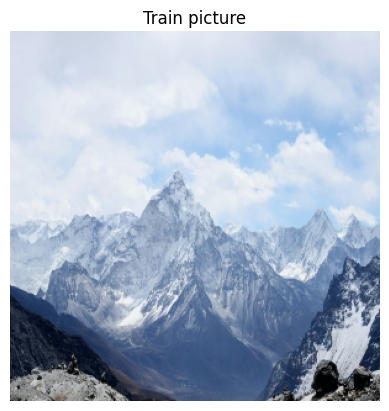

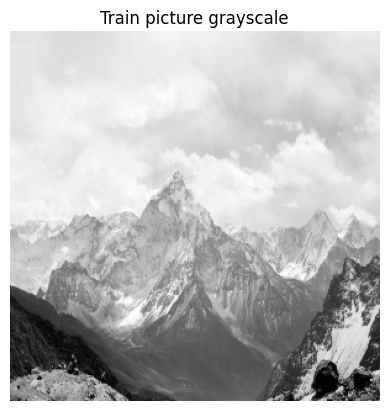

In [75]:
plt.imshow(image)
plt.axis('off')
plt.title("Train picture")
plt.show()

plt.imshow(image_gray, cmap=plt.cm.gray)
plt.axis('off')
plt.title("Train picture grayscale")
plt.show()

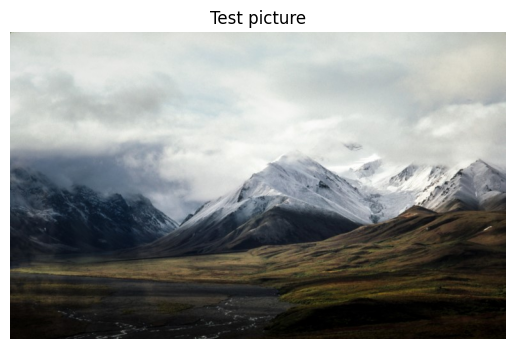

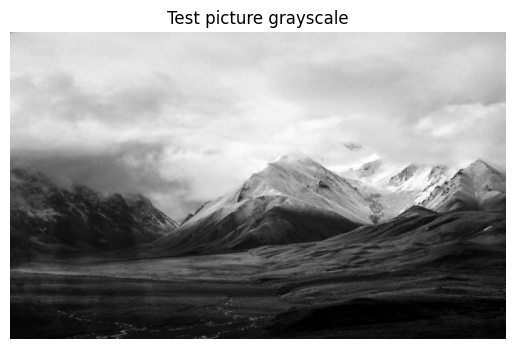

In [76]:
plt.imshow(image_test_color)
plt.axis('off')
plt.title("Test picture")
plt.show()

plt.imshow(image_test_gray, cmap=plt.cm.gray)
plt.axis('off')
plt.title("Test picture grayscale")
plt.show()

#### 2) Провести видiлення усiх патчiв iз кольорового оригiнального зображення та його копiї у вiдтiнках сiрого.

In [49]:
patch_size = (16, 16)
color_patches = extract_patches_2d(image, patch_size)
gray_patches = extract_patches_2d(image_gray, patch_size)

color_patches.shape, gray_patches.shape

((81225, 16, 16, 3), (81225, 16, 16))

In [50]:
image_test_gray = cv2.resize(image_test_gray, (150, 150))
patch_size = (16, 16)
step = 2

image_height, image_width = image_test_gray.shape

#### 3) На основi вибiрок зображень створити навчальну та тестовi вибiрки для колоризацiї зображень.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(gray_patches, color_patches, test_size=0.2, random_state=0)

input_img = keras.Input(shape=(16, 16, 1))

#### 4) Створення моделі ***автоенкодеру***

In [52]:
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

In [53]:
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='relu', padding='same')(x)

In [54]:
model = keras.Model(input_img, decoded)
model.compile(optimizer='adam', loss='mean_squared_error',
metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 16, 16, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 8)           1160      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 4, 4, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 8)           584 

#### 5) Проведення навчання моделі

In [55]:
hist = model.fit(X_train, y_train, epochs=7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
2031/2031 [==============================] - 55s 26ms/step - loss: 1385.7031 - accuracy: 0.9774 - val_loss: 284.8171 - val_accuracy: 0.9879
Epoch 2/7
2031/2031 [==============================] - 50s 25ms/step - loss: 242.4634 - accuracy: 0.9872 - val_loss: 220.1507 - val_accuracy: 0.9868
Epoch 3/7
2031/2031 [==============================] - 51s 25ms/step - loss: 206.4702 - accuracy: 0.9870 - val_loss: 208.7793 - val_accuracy: 0.9872
Epoch 4/7
2031/2031 [==============================] - 51s 25ms/step - loss: 193.8766 - accuracy: 0.9875 - val_loss: 193.7968 - val_accuracy: 0.9871
Epoch 5/7
2031/2031 [==============================] - 51s 25ms/step - loss: 186.3125 - accuracy: 0.9876 - val_loss: 191.1572 - val_accuracy: 0.9874
Epoch 6/7
2031/2031 [==============================] - 57s 28ms/step - loss: 181.5004 - accuracy: 0.9876 - val_loss: 196.0555 - val_accuracy: 0.9872
Epoch 7/7
2031/2031 [==============================] - 49s 24ms/step - loss: 177.0108 - accuracy: 0.9876 

#### 6) Колоризация тестового зображення

In [56]:
colorized_image = np.zeros((image_height, image_width, 3), dtype=np.uint8)

In [57]:
for y in range(0, image_height - patch_size[0] + 1, step):
  for x in range(0, image_width - patch_size[1] + 1, step):
    patch = image_test_gray[y:y + patch_size[0], x:x + patch_size[1]]
    patch = np.expand_dims(np.expand_dims(patch, axis=0), axis=3)
    colorized_patch = model.predict(patch)
    colorized_patch = colorized_patch.astype(np.uint8)
    colorized_image[y:y + patch_size[0], x:x + patch_size[1]] = colorized_patch[0]

1/1 [==============================] - 0s 45ms/step


In [58]:
mse = np.mean((image_test_gray - cv2.cvtColor(colorized_image, cv2.COLOR_BGR2GRAY)) ** 2)

Mean Squared Error (MSE): 24795.952876701504


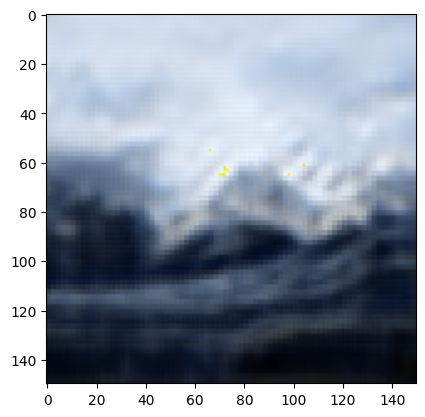

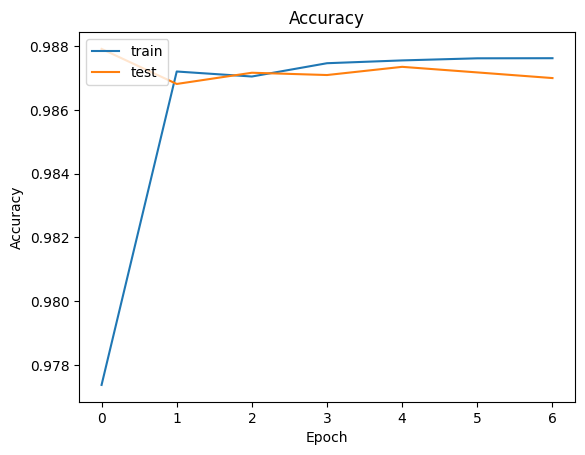

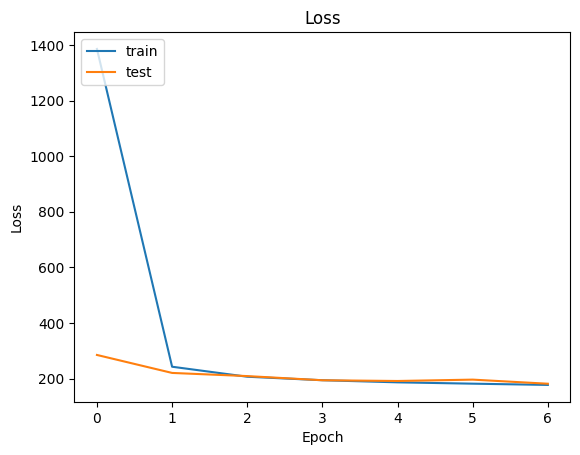

In [59]:
print(f"Mean Squared Error (MSE): {mse}")

plt.imshow(colorized_image)
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy.png')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss.png')
plt.show()

#### 7) Колоризация тренувального зображення

In [60]:
image_test_gray = cv2.resize(image_gray, (150, 150))
patch_size = (16, 16)
step = 2

In [61]:
image_height, image_width = image_test_gray.shape
colorized_image = np.zeros((image_height, image_width, 3), dtype=np.uint8)

In [62]:
for y in range(0, image_height - patch_size[0] + 1, step):
  for x in range(0, image_width - patch_size[1] + 1, step):
    patch = image_test_gray[y:y + patch_size[0], x:x + patch_size[1]]
    patch = np.expand_dims(np.expand_dims(patch, axis=0), axis=3)
    colorized_patch = model.predict(patch)
    colorized_patch = colorized_patch.astype(np.uint8)
    colorized_image[y:y + patch_size[0], x:x + patch_size[1]] = colorized_patch[0]


1/1 [==============================] - 0s 41ms/step


In [63]:
mse = np.mean((image_test_gray - cv2.cvtColor(colorized_image, cv2.COLOR_BGR2GRAY)) ** 2)


Mean Squared Error (MSE): 34153.51037200692


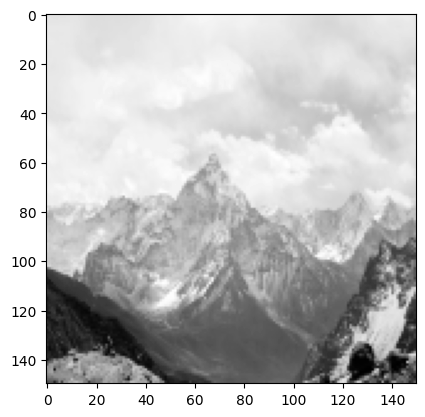

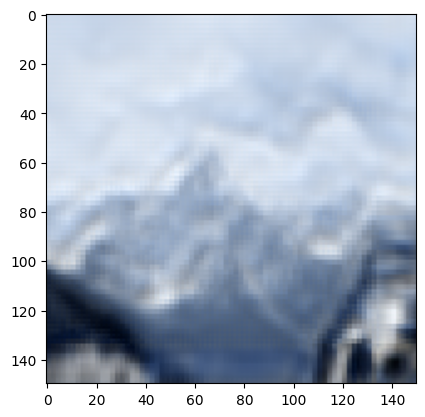

True

In [64]:
print(f"Mean Squared Error (MSE): {mse}")

plt.imshow(image_test_gray, cmap=plt.cm.gray)
plt.show()

plt.imshow(colorized_image)
plt.show()
cv2.imwrite('train_colored.jpg', colorized_image)

# **`Завдання 2`**. Робота з Fashion MNIST

#### 1) Завантаження датасету `Fashion MNIST`

In [94]:
(X_train, y_train), (_, _) = fashion_mnist.load_data()

In [115]:
selected_classes = [9, 8, 7]
X_train_select = X_train[np.isin(y_train, selected_classes)]
y_train_select = y_train[np.isin(y_train, selected_classes)]

X_train_shuff, _, y_train_shuff, _ = train_test_split(X_train_select, y_train_select, test_size=0.1, random_state=42, stratify=y_train_select)

X_train_shuff = X_train_shuff[:900]
y_train_shuff = y_train_shuff[:900]

#### 2) Обрати три з наявних в датасетi класiв для подальшої роботи. Знайти декiлька зображень, на яких наявнi по декiлька предметiв одягу з обраних класiв в рiзних комбiнацiях.

In [116]:
class_names = ['Tshirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

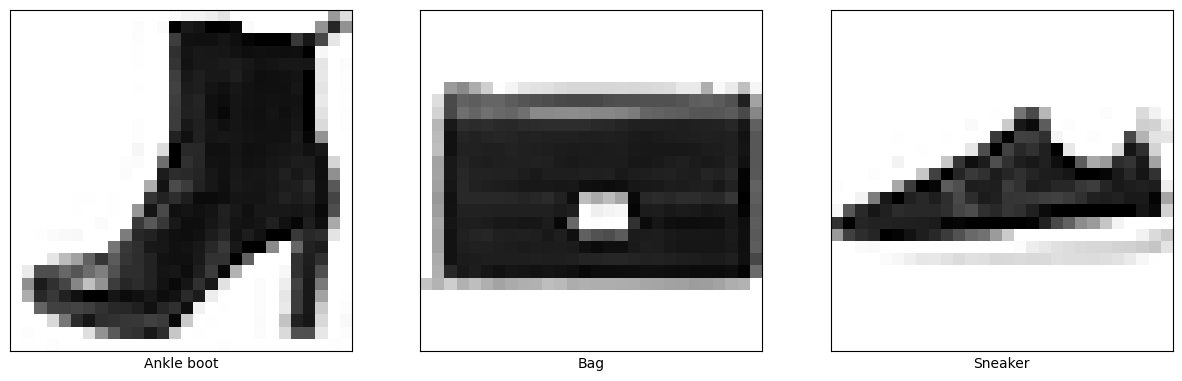

In [117]:
def display_one_image_per_class(images, labels, class_names):
    plt.figure(figsize=(15, 5))

    for i, class_id in enumerate(selected_classes):
        class_indices = np.where(labels == class_id)[0]
        image_index = class_indices[0]

        plt.subplot(1, len(selected_classes), i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[image_index], cmap=plt.cm.binary)
        plt.xlabel(class_names[class_id])

    plt.show()

display_one_image_per_class(X_train_shuff, y_train_shuff, class_names)

In [118]:
# проводжу патчінг
patch_sizes = [(7, 7), (8, 8)]
orb = ORB()

def orb_features(image_patch):
    orb.detect_and_extract(image_patch)
    return orb.descriptors

#### 3) Метод `MiniBatchDictionaryLearning`

In [119]:
data = []
for patch_size in patch_sizes:
    patches_all = []
    labels = []
    for _, (img, label) in enumerate(zip(X_train_shuff, y_train_shuff)):
        patches = extract_patches_2d(img, patch_size)
        patches = patches.reshape(patches.shape[0], -1).astype("float32")
        c_mean = np.mean(patches, axis=0)
        c_std = np.std(patches, axis=0)
        patches -= c_mean
        patches /= c_std
        patches_all.extend(patches)
        labels.extend([label] * len(patches))

    dictionary = MiniBatchDictionaryLearning(
        n_components=100, batch_size=512, max_iter=10, random_state=42
    )
    sparsecode = dictionary.fit_transform(patches_all)
    patches_train, patches_test, labels_train, labels_test = train_test_split(
        sparsecode, labels, test_size=0.2, random_state=42
    )
    for k in range(2, 4):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(patches_train, labels_train)
        predictions = knn.predict(patches_test)
        score = accuracy_score(labels_test, predictions)
        data.append((patch_size[0], k, score))

In [125]:
mini_batch_df = pd.DataFrame(data, columns=["patch_size", "n_neighbors", "accuracy"])
mini_batch_df

,patch_size,n_neighbors,accuracy
0,7,2,0.809711
1,7,3,0.818767
2,8,2,0.819413
3,8,3,0.827160


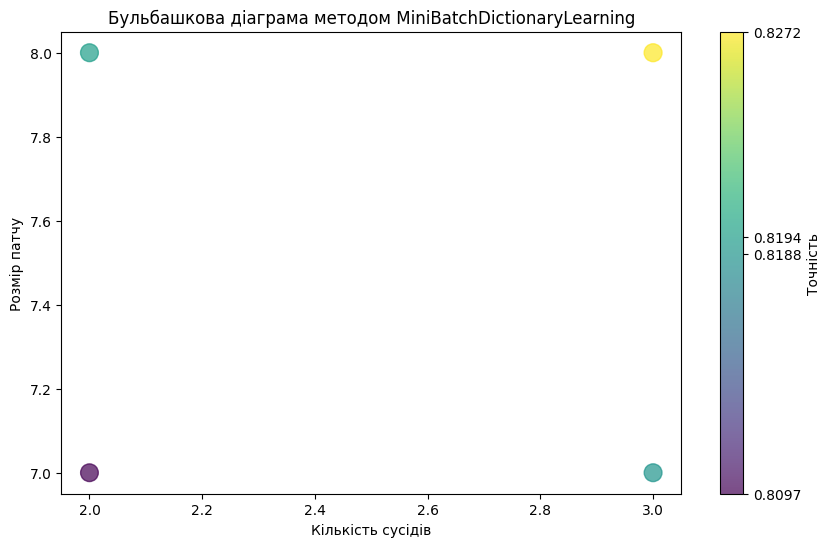

In [128]:
x_values = mini_batch_df["n_neighbors"]
y_values = mini_batch_df["patch_size"]
sizes = mini_batch_df["accuracy"] * 200  # Adjust the multiplier as needed
colors = mini_batch_df["accuracy"]  # Use accuracy values for colors

plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_values, y_values, s=sizes, c=colors, cmap="viridis", alpha=0.7)

plt.title("Бульбашкова діаграма методом MiniBatchDictionaryLearning")
plt.xlabel("Кількість сусідів")
plt.ylabel("Розмір патчу")

# Create a colorbar with accuracy values
cbar = plt.colorbar(scatter, label="Точність")
cbar.set_ticks(colors)
cbar.set_ticklabels(["{:.4f}".format(val) for val in colors])

plt.show()

#### 4) Метод `Bag of Visual Words`

In [122]:
data_bovw = []
for patch_size in patch_sizes:
    descriptors = []
    labels = []
    for _, (img, label) in enumerate(zip(X_train_shuff, y_train_shuff)):
        patches = extract_patches_2d(img, patch_size)
        patches = patches.reshape(patches.shape[0], -1).astype("float32")
        c_mean = np.mean(patches, axis=0)
        c_std = np.std(patches, axis=0)
        patches -= c_mean
        patches /= c_std
        des = orb_features(patches)
        descriptors.extend(des)
        labels.extend([label] * len(des))
    descriptors_train, descriptors_test, labels_train, labels_test = train_test_split(
        descriptors, labels, test_size=0.2, random_state=42
    )

    for k in range(2, 5):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(descriptors_train, labels_train)
        predictions = knn.predict(descriptors_test)
        accuracy = accuracy_score(labels_test, predictions)
        data_bovw.append((patch_size[0], k, accuracy))

In [123]:
bovw_batch_df = pd.DataFrame(
    data_bovw, columns=["patch_size", "n_neighbors", "accuracy"]
)
bovw_batch_df

,patch_size,n_neighbors,accuracy
0,7,2,0.795897
1,7,3,0.746362
2,7,4,0.750962
3,8,2,0.856584
4,8,3,0.835619
5,8,4,0.821696


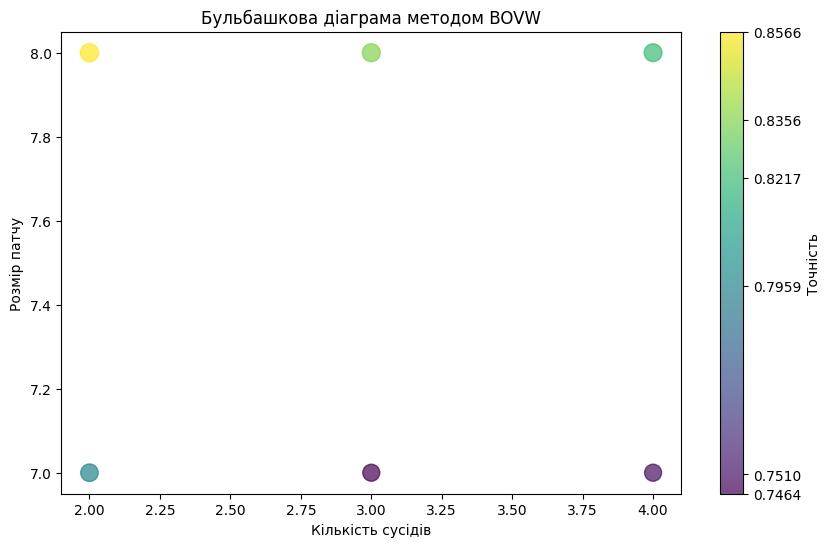

In [127]:
x_values = bovw_batch_df["n_neighbors"]
y_values = bovw_batch_df["patch_size"]
sizes = bovw_batch_df["accuracy"] * 200  # Adjust the multiplier as needed
colors = bovw_batch_df["accuracy"]  # Use accuracy values for colors

plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_values, y_values, s=sizes, c=colors, cmap="viridis", alpha=0.7)

plt.title("Бульбашкова діаграма методом BOVW")
plt.xlabel("Кількість сусідів")
plt.ylabel("Розмір патчу")

# Create a colorbar with accuracy values
cbar = plt.colorbar(scatter, label="Точність")
cbar.set_ticks(colors)
cbar.set_ticklabels(["{:.4f}".format(val) for val in colors])

plt.show()